In [1]:
# import comet_ml in the top of your file
from comet_ml import Experiment

# Add the following code anywhere in your machine learning file
experiment = Experiment(api_key="tC4A7YA778cHBZYNZqwsXDpRx",
                        project_name="general", workspace="pratikkulkarni228")


COMET INFO: Experiment is live on comet.ml https://www.comet.ml/pratikkulkarni228/general/fd2fac4ec40c48f99b1f28ee07d0b523



In [0]:
#!pip install comet_ml

In [3]:

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.optimizers import SGD #Stochastic Gradient Descent Optimizer

import numpy as np
import pickle



Using TensorFlow backend.


In [0]:
# pfile = open('msft_8515.pickle','rb')
# temp = pickle.load(pfile)

# len(temp['train_X'])

In [0]:
# dimensions of our images.
img_width, img_height =  598,434

data_file = open('msft_8515.pickle','rb')
dataset=pickle.load(data_file)

train_X = dataset['train_X']
train_y = dataset['train_y']

test_X = dataset['test_X']
test_y = dataset['test_y']


#Pre processing data
train_X = np.reshape(train_X,newshape=(train_X.shape[0],1,train_X.shape[1],train_X.shape[2]))
test_X = np.reshape(test_X,newshape=(test_X.shape[0],1,test_X.shape[1],test_X.shape[2]))

#Normalize
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X /= 255
test_X /= 255


In [0]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=(1,598,434),data_format='channels_first'))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(3)) #3 classes
model.add(Activation('softmax'))


sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])


In [7]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 596, 432)      320       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 596, 432)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 298, 432)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 296, 64)       248896    
_________________________________________________________________
activation_2 (Activation)    (None, 14, 296, 64)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 148, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 66304)             0         
__________

In [8]:
model.fit(train_X,train_y,epochs=50,batch_size=32,verbose=1)

Epoch 1/50
598/598 [==============================] - 10s 17ms/step - loss: 1.1162 - acc: 0.3512
Epoch 2/50
598/598 [==============================] - 5s 9ms/step - loss: 1.0877 - acc: 0.4097
Epoch 3/50
598/598 [==============================] - 5s 9ms/step - loss: 1.0823 - acc: 0.4147
Epoch 4/50
598/598 [==============================] - 5s 9ms/step - loss: 1.0802 - acc: 0.4181
Epoch 5/50
598/598 [==============================] - 5s 9ms/step - loss: 1.0720 - acc: 0.4130
Epoch 6/50
598/598 [==============================] - 5s 9ms/step - loss: 1.0574 - acc: 0.4498
Epoch 7/50
598/598 [==============================] - 5s 9ms/step - loss: 1.0461 - acc: 0.4532
Epoch 8/50
598/598 [==============================] - 5s 9ms/step - loss: 1.0319 - acc: 0.4816
Epoch 9/50
598/598 [==============================] - 5s 9ms/step - loss: 0.9887 - acc: 0.5301
Epoch 10/50
598/598 [==============================] - 5s 9ms/step - loss: 0.9381 - acc: 0.5602
Epoch 11/50
598/598 [==========================

In [0]:
model.save_weights('98_acc_8515split.h5')  # always save your weights after training or during training



In [0]:
score = model.predict(test_X)

In [11]:
print(score)

[[9.43650842e-01 8.88768467e-04 5.54603636e-02]
 [9.96874094e-01 1.09372009e-03 2.03213305e-03]
 [9.40294921e-01 5.94727844e-02 2.32247388e-04]
 [9.93843079e-01 1.89051416e-03 4.26638965e-03]
 [9.96165156e-01 3.18721868e-03 6.47646259e-04]
 [9.99480188e-01 1.01451493e-04 4.18395473e-04]
 [9.75302041e-01 2.82269344e-03 2.18752138e-02]
 [9.96904790e-01 2.50712642e-03 5.88004128e-04]
 [9.98823464e-01 1.63643301e-04 1.01288478e-03]
 [9.99551237e-01 1.07079009e-04 3.41616833e-04]
 [9.70067382e-01 2.94111408e-02 5.21546055e-04]
 [9.98581648e-01 4.45793092e-04 9.72589769e-04]
 [9.96057153e-01 3.76322470e-03 1.79606184e-04]
 [9.99461114e-01 1.04976411e-04 4.33891924e-04]
 [9.99584258e-01 8.88535724e-05 3.26855137e-04]
 [9.94378984e-01 6.84949220e-04 4.93609020e-03]
 [1.11777976e-01 8.88199568e-01 2.24169289e-05]
 [9.95197713e-01 1.31729140e-03 3.48489895e-03]
 [9.95230973e-01 1.62619201e-03 3.14281974e-03]
 [9.69832540e-01 2.34513311e-03 2.78223995e-02]
 [9.79684591e-01 2.27405922e-03 1.804137

In [0]:
y_pred = score.argmax(axis=-1)

In [0]:
y_test = test_y.argmax(axis=-1)

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
cm = confusion_matrix(y_test, y_pred)


In [23]:
print(cm)

[[38  2  0]
 [ 0 50  0]
 [ 0  0 13]]


In [0]:
import matplotlib.pyplot as plt

In [0]:
import itertools
def plot_confusion_matrix(cm,test_y, pred_y, class_names, filename):
    """
    This function prints and plots the confusion matrix.
    """
    cmap = plt.cm.Blues
    # Compute confusion matrix
    cm = cm
    np.set_printoptions(precision=2)
    # Plot confusion matrix
    plt.figure()
    plt.grid('off')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title("Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig(filename + ".png")


[[38  2  0]
 [ 0 50  0]
 [ 0  0 13]]


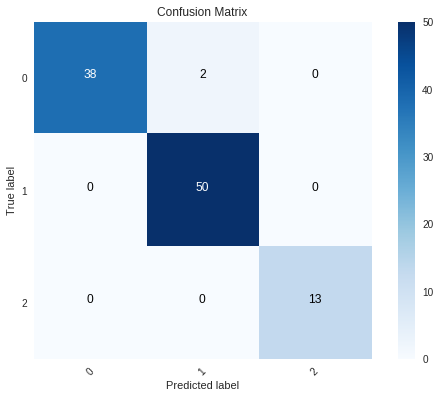

In [49]:
class_names = [0,1,2]
plot_confusion_matrix(cm,y_test, y_pred, class_names, 'test_conf')